In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import pickle
from utils import get_best_t
from utils import get_theory_curves

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
font = {'family' : 'Arial',
    'weight' : 'medium',
    'size'   : 14,
    'style'  : 'normal'}
matplotlib.rc('font', **font)

In [4]:
T_values = np.arange(100, 301, 10)
v0_values = [0.0001, 0.2, 0.4, 0.6, 0.8, 1, 1.5, 2, 2.5, 3, 3.5,
             4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.6,
             10, 10.5, 11, 11.5, 12, 12.5, 13, 14, 15]

In [2]:
# Get theoretical positions and depths of log-derivative minima
# across a grid of loop periods T and effective fragment lengths v0

theory_xmins, theory_ymins, s_grid, v0_values = get_theory_curves()

Wild type
y-minimum is =  -1.0793835516193144
x-minimum is =  11.958260743101398
Inferred T =  100
Inferred v0 =  1.5
RAD21, 20nM degron
y-minimum is =  -1.1839419480015823
x-minimum is =  15.968719422671311
Inferred T =  170
Inferred v0 =  1.5
RAD21, 45nM degron
y-minimum is =  -1.2097928183001616
x-minimum is =  20.445048300260872
Inferred T =  220
Inferred v0 =  1.5


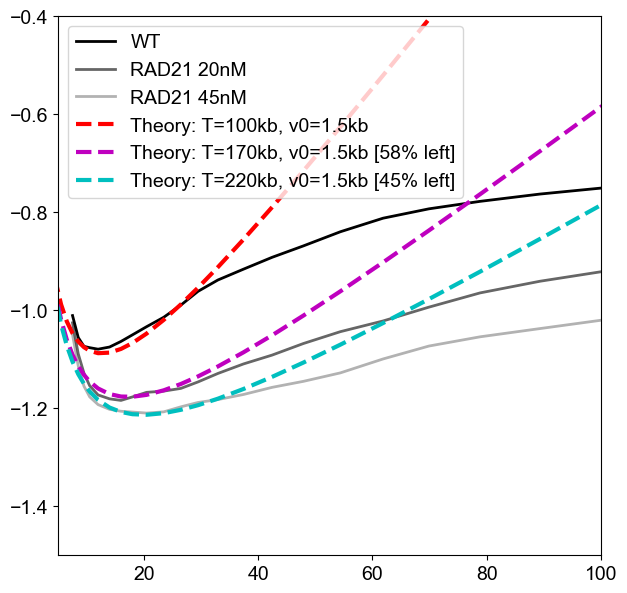

In [9]:
fig = plt.figure(figsize=(7, 7)) 

#data_dir = "logders_fig4"
data_dir = "../data/data_fig4"

slope_wt = pickle.load(open(f'{data_dir}/full_logder_y_shah_untagged_untreated_merge-rep1-2.pickle', 'rb'))
mids = pickle.load(open(f'{data_dir}/full_logder_x_shah_untagged_untreated_merge-rep1-2.pickle', 'rb'))

slope_rad21_20nm = pickle.load(open(f'{data_dir}/full_logder_y_shah_RAD21-FKBP_dTAG-20nM_rep1_RSHIC41.pickle', 'rb'))
mids = pickle.load(open(f'{data_dir}/full_logder_x_shah_RAD21-FKBP_dTAG-20nM_rep1_RSHIC41.pickle', 'rb'))

slope_rad21_45nm = pickle.load(open(f'{data_dir}/full_logder_y_shah_RAD21-FKBP_dTAG-45nM_rep2_RSHIC42.pickle', 'rb'))
mids = pickle.load(open(f'{data_dir}/full_logder_x_shah_RAD21-FKBP_dTAG-45nM_rep2_RSHIC42.pickle', 'rb'))

plt.plot(mids[1:], slope_wt, color='k', linewidth=2, label='WT')

plt.plot(mids[1:], slope_rad21_20nm, color='k', alpha=0.6, linewidth=2, label='RAD21 20nM')

plt.plot(mids[1:], slope_rad21_45nm, color='k', alpha=0.3, linewidth=2, label='RAD21 45nM')

print("Wild type")
y = np.min(slope_wt[0:20])
x = mids[1+np.argmin(slope_wt[0:20])]

print("y-minimum is = ", y)
print("x-minimum is = ", x)

t, v0, err = get_best_t((x, y), theory_xmins=theory_xmins, theory_ymins=theory_ymins, T_values=T_values,
v0_values=v0_values, x_weight=1e-4)

print("Inferred T = ", t)
print("Inferred v0 = ", v0)

print("RAD21, 20nM degron")
y = np.min(slope_rad21_20nm[0:20])
x = mids[1+np.argmin(slope_rad21_20nm[0:20])]

print("y-minimum is = ", y)
print("x-minimum is = ", x)

t, v0, err = get_best_t((x, y), theory_xmins=theory_xmins, theory_ymins=theory_ymins, T_values=T_values,
v0_values=v0_values, x_weight=1e-4)

print("Inferred T = ", t)
print("Inferred v0 = ", v0)

print("RAD21, 45nM degron")
y = np.min(slope_rad21_45nm[0:20])
x = mids[1+np.argmin(slope_rad21_45nm[0:20])]

print("y-minimum is = ", y)
print("x-minimum is = ", x)

t, v0, err = get_best_t((x, y), theory_xmins=theory_xmins, theory_ymins=theory_ymins, T_values=T_values,
v0_values=v0_values, x_weight=1e-4)

print("Inferred T = ", t)
print("Inferred v0 = ", v0)



ld = 100
v0 = 1.5
gamma = lambda s: 2*s/(3*v0)
der = lambda s: gaussian_filter1d(3*s*gamma(s)*(gamma(s)+2)/(ld*2*(gamma(s)+1)**2) - 3*gamma(s)/(2*(gamma(s)+1)), 0.1)

plt.plot(mids[1:], der(mids[1:]), color='r', linewidth=3,  linestyle='--', label='Theory: T=100kb, v0=1.5kb')

ld = 170
v0 = 1.5
gamma = lambda s: 2*s/(3*v0)
der = lambda s: gaussian_filter1d(3*s*gamma(s)*(gamma(s)+2)/(ld*2*(gamma(s)+1)**2) - 3*gamma(s)/(2*(gamma(s)+1)), 0.1)

plt.plot(mids[1:], der(mids[1:]), color='m', alpha=1, linewidth=3,  linestyle='--', label='Theory: T=170kb, v0=1.5kb [58% left]')

ld = 220
v0 = 1.5
gamma = lambda s: 2*s/(3*v0)
der = lambda s: gaussian_filter1d(3*s*gamma(s)*(gamma(s)+2)/(ld*2*(gamma(s)+1)**2) - 3*gamma(s)/(2*(gamma(s)+1)), 0.1)

plt.plot(mids[1:], der(mids[1:]), color='c', alpha=1, linewidth=3, linestyle='--', label='Theory: T=220kb, v0=1.5kb [45% left]')


plt.ylim([-1.5, -0.4])
plt.xlim([5, 100])

#plt.title('Nora 2025: Partial RAD21 depletion')
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()
